In [12]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential

In [13]:
train_path='D:/Project AI/Covid_19/Covid_19_CNN_model/Covid19-dataset/train'
test_path='D:/Project AI/Covid_19\Covid_19_CNN_model/Covid19-dataset/test'

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Mohamed orabi\AppData\Local\Temp\ipykernel_48788\2579414475.py:2: SyntaxWarning: invalid escape sequence '\C'
  test_path='D:/Project AI/Covid_19\Covid_19_CNN_model/Covid19-dataset/test'


In [14]:
# Get classes name
classes_name=os.listdir(train_path)
classes_name

['Covid', 'Normal', 'Viral Pneumonia']

In [15]:
def plot_image(class_name):
    plt.figure(figsize=(15,10))
    for i , category in enumerate(class_name):
        img_path = train_path + '/' + category
        img_in_folder=os.listdir(img_path)
        
        first_img=img_in_folder[1]
        first_img_path=img_path + '/'+first_img 
        
        img=image.load_img(first_img_path)
        img_array=image.img_to_array(img)/255
        
        plt.subplot(1,3,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

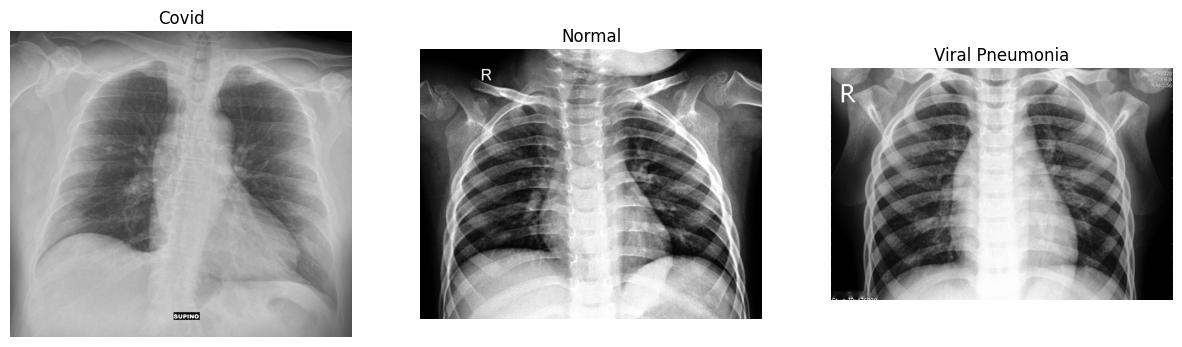

In [16]:
plot_image(classes_name)

In [17]:
data_generator=ImageDataGenerator(rescale=1/255)

In [18]:
train_data=data_generator.flow_from_directory(train_path,
                                              batch_size=16,
                                              target_size=(224,224))

Found 251 images belonging to 3 classes.


In [19]:
test_data=data_generator.flow_from_directory(test_path,
                                            target_size=(224,224),
                                            batch_size=1)

Found 66 images belonging to 3 classes.


In [20]:
train_data.image_shape

(224, 224, 3)

## Build cnn model

In [21]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same',input_shape=[224,224,3]))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
# model.add(Dense(64,activation='relu'))

model.add(Dense(3,activation='softmax'))

c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model_hist=model.fit(train_data,validation_data=test_data,epochs=5)

Epoch 1/5


c:\Users\Mohamed orabi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 438ms/step - accuracy: 0.4230 - loss: 6.0441 - val_accuracy: 0.6515 - val_loss: 0.9706
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 396ms/step - accuracy: 0.8673 - loss: 0.3150 - val_accuracy: 0.7727 - val_loss: 0.5125
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 414ms/step - accuracy: 0.9538 - loss: 0.1023 - val_accuracy: 0.7273 - val_loss: 1.1820
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 394ms/step - accuracy: 0.9776 - loss: 0.1120 - val_accuracy: 0.9545 - val_loss: 0.1973
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 409ms/step - accuracy: 0.9918 - loss: 0.0372 - val_accuracy: 0.8788 - val_loss: 0.3307


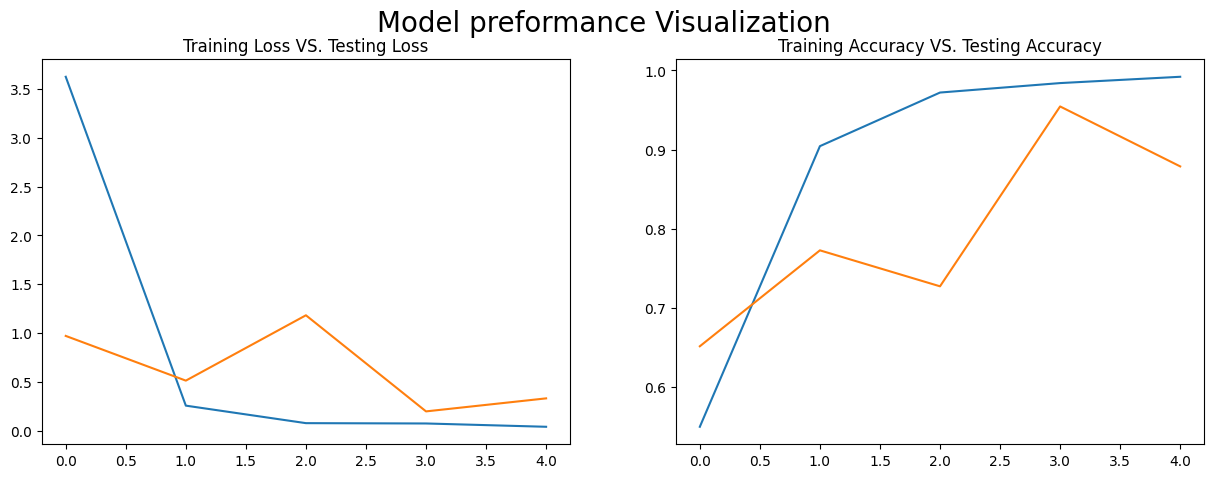

In [24]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
fig.suptitle("Model preformance Visualization",fontsize=20)
ax[0].plot(model_hist.history['loss'],label='Training Loss')
ax[0].plot(model_hist.history['val_loss'],label='Testing Loss')
ax[0].set_title("Training Loss VS. Testing Loss")

ax[1].plot(model_hist.history['accuracy'],label='Training Accuracy')
ax[1].plot(model_hist.history['val_accuracy'],label='Testing Accuracy')
ax[1].set_title("Training Accuracy VS. Testing Accuracy")
plt.show()

In [25]:
loos,acc=model.evaluate(train_data)
print(f'Accuracy of training is {acc*100}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.9990 - loss: 0.0117
Accuracy of training is 99.60159659385681


In [26]:
loos,acc=model.evaluate(test_data)
print(f'Accuracy of testing is {acc*100}')

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8456 - loss: 0.5338
Accuracy of testing is 87.87878751754761


In [31]:
testing_img="D:/Project AI/Covid_19/Covid_19_CNN_model/Covid19-dataset/test/Viral Pneumonia/0117.jpeg"

In [32]:
class_map=dict([value,key] for key,value in train_data.class_indices.items())
class_map

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [29]:
def predication (testing_img,actual_label):
    test_img=image.load_img(testing_img,target_size=(224,224))
    test_img_arr=image.img_to_array(test_img)/255
    test_img_input=test_img_arr.reshape((1,test_img_arr.shape[0],
                                         test_img_arr.shape[1],
                                         test_img_arr.shape[2]))
    
    # Make predication 
    predicate_class=np.argmax(model.predict(test_img_input))
    predicated_map=class_map[predicate_class]
    
    plt.figure(figsize=(10,5))
    plt.imshow(test_img_arr)
    plt.grid()
    plt.axis('off')
    plt.title(f"Actual Label is: {actual_label} | predict label is: {predicated_map}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


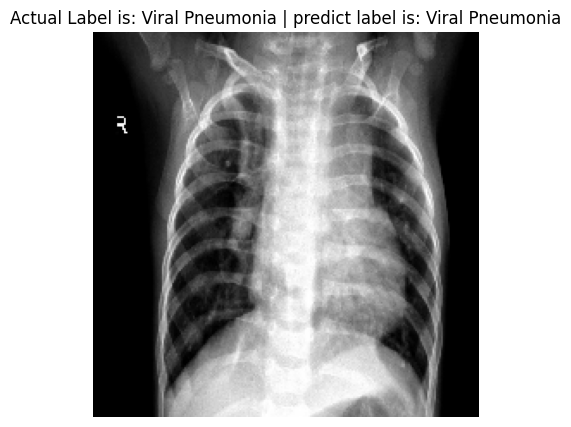

In [33]:
predication(testing_img,actual_label='Viral Pneumonia')